# Glass Ceiling - A Perspective on Earning Salary Over the last 15 Years

## Objective: 
To show the differences in earning salary population for mexican woman during the last 15 years.<br /> After our data exploration, we just came down to three data sources which are:
* **Population by gender and earned salary.**
* Busy population by formality under economical activity

## Cleaning Sources
### Salary per Gender over the last 15 years

The further analysis will try to make a statment about how women economical growth has been slower than men in Mexico.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

We import our sources:

In [2]:
asalariados=pd.read_csv('Porcentaje_de_Asalariados_que_Ganan_hasta_tres_Salarios_Minimos.csv')

So first lets replace ND to NaN

In [3]:
asalariados=asalariados.replace('ND',np.NaN)

And drop empty values; p.e.: with 6 or more Null values per row:

In [4]:
asalariados=asalariados.dropna(thresh=6)

In [5]:
asalariados.head()

,Periodo,Trimestre,Entidad_Federativa,Sexo,Asalariados que ganan hasta 3 salarios mínimos,Asalariados que reportan ingresos,Porcentaje de asalariados que ganan hasta tres salarios mínimos
0,2005,1.0,Nacional,Hombres,9723085,14802566,65.685132
1,2005,1.0,Nacional,Mujeres,6290725,8602165,73.129555
2,2005,2.0,Nacional,Hombres,9399550,14647255,64.172775
3,2005,2.0,Nacional,Mujeres,6319112,8755287,72.174813
4,2005,3.0,Nacional,Hombres,9428780,14792341,63.740959


In [6]:
asalariados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 127
Data columns (total 7 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Periodo                                                          126 non-null    object 
 1   Trimestre                                                        126 non-null    float64
 2   Entidad_Federativa                                               126 non-null    object 
 3   Sexo                                                             126 non-null    object 
 4   Asalariados que ganan hasta 3 salarios mínimos                   126 non-null    object 
 5   Asalariados que reportan ingresos                                126 non-null    object 
 6   Porcentaje de asalariados que ganan hasta tres salarios mínimos  126 non-null    object 
dtypes: float64(1), object(6)
memory usage: 7.9+ K

Let's convert accordingly the `dtypes`of the `asalariados` dataframe.

In [7]:
asalariado=asalariados.convert_dtypes()

In [8]:
asalariado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 127
Data columns (total 7 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Periodo                                                          126 non-null    string
 1   Trimestre                                                        126 non-null    Int64 
 2   Entidad_Federativa                                               126 non-null    string
 3   Sexo                                                             126 non-null    string
 4   Asalariados que ganan hasta 3 salarios mínimos                   126 non-null    string
 5   Asalariados que reportan ingresos                                126 non-null    string
 6   Porcentaje de asalariados que ganan hasta tres salarios mínimos  126 non-null    string
dtypes: Int64(1), string(6)
memory usage: 8.0 KB


And `to_numeric()`:

In [9]:
asalariados['Asalariados que ganan hasta 3 salarios mínimos']=pd.to_numeric(asalariados['Asalariados que ganan hasta 3 salarios mínimos'])

In [10]:
asalariados['Asalariados que reportan ingresos']=pd.to_numeric(asalariados['Asalariados que reportan ingresos'])

In [11]:
asalariados['Porcentaje de asalariados que ganan hasta tres salarios mínimos']=pd.to_numeric(asalariados['Porcentaje de asalariados que ganan hasta tres salarios mínimos'])

In [12]:
asalariados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 127
Data columns (total 7 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Periodo                                                          126 non-null    object 
 1   Trimestre                                                        126 non-null    float64
 2   Entidad_Federativa                                               126 non-null    object 
 3   Sexo                                                             126 non-null    object 
 4   Asalariados que ganan hasta 3 salarios mínimos                   126 non-null    int64  
 5   Asalariados que reportan ingresos                                126 non-null    int64  
 6   Porcentaje de asalariados que ganan hasta tres salarios mínimos  126 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usa

Now that we have the `asalariados` dataframe cleaned, let's start by analysing the change by gender on earning population over the last years.

In [13]:
asalariados['Periodo'].unique()

array(['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype=object)

### Population amount per gender each 5 years for the last 15 years

In [14]:
poblacion=pd.read_csv('Poblacion_02.csv')

#Fuentes:
#INEGI. II Conteo de Población y Vivienda 2005.
#INEGI. Censo de Población y Vivienda 2010.
#INEGI. Censo de Población y Vivienda 2020.

#Información para población mayor a 15 años para representar mayor ocupación laboral

In [15]:
poblacion

,Periodo,Género,Total
0,2005,Hombres,50249955
1,2010,Hombres,54855231
2,2020,Hombres,61473390
3,2005,Mujeres,53013433
4,2010,Mujeres,57481307
5,2020,Mujeres,64540634


In [16]:
poblacion.set_index('Periodo')

,Género,Total
Periodo,,
2005,Hombres,50249955
2010,Hombres,54855231
2020,Hombres,61473390
2005,Mujeres,53013433
2010,Mujeres,57481307
2020,Mujeres,64540634


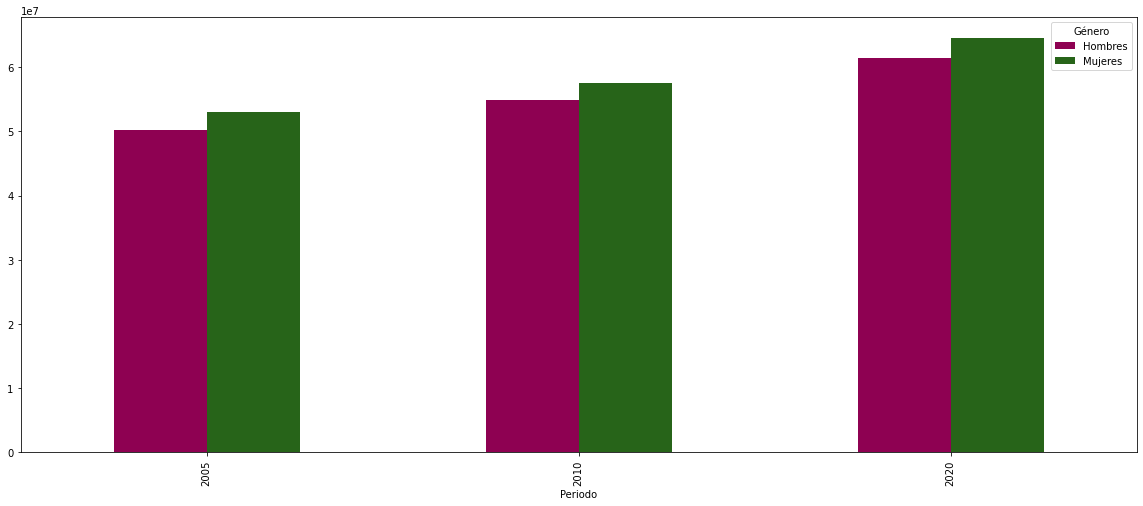

In [17]:
# Checamos diferencias visuales entre la población:
ax0 = poblacion.groupby(['Periodo', 'Género']).sum()['Total'].unstack()
# genera el gráfico:
ax0.plot(kind="bar",figsize =(20, 8),colormap='PiYG')

If we check differences with percentage on the mean population:

In [18]:
popM = (
    poblacion.loc[poblacion['Género']=='Mujeres']
    .groupby('Periodo')
    .agg({'Total':'sum'})
    .reset_index()
)
popM.set_index('Periodo')
popM=popM.rename(columns = {'Total':'Mujeres'})

In [19]:
popH = (
    poblacion.loc[poblacion['Género']=='Hombres']
    .groupby('Periodo')
    .agg({'Total':'sum'})
    .reset_index()
)
popH.set_index('Periodo')
popH=popH.rename(columns = {'Total':'Hombres'})

In [20]:
nPop=pd.concat(
    [
        popM
        ,popH.iloc[:,1]
    ]
    ,axis=1,ignore_index=False)

nPop=nPop.set_index('Periodo')

In [21]:
nPop['Total']=nPop['Mujeres']+nPop['Hombres']
nPop['%Mujeres']=np.round(nPop['Mujeres']/nPop['Total']*100,2)
nPop['%Hombres']=np.round(nPop['Hombres']/nPop['Total']*100,2)

In [22]:
nPop

,Mujeres,Hombres,Total,%Mujeres,%Hombres
Periodo,,,,,
2005,53013433,50249955,103263388,51.34,48.66
2010,57481307,54855231,112336538,51.17,48.83
2020,64540634,61473390,126014024,51.22,48.78


In [23]:
np.round(nPop['%Mujeres'].mean(),2)

51.24

## People who register income per year

We have continuous data from the last 15 years until 2020. 

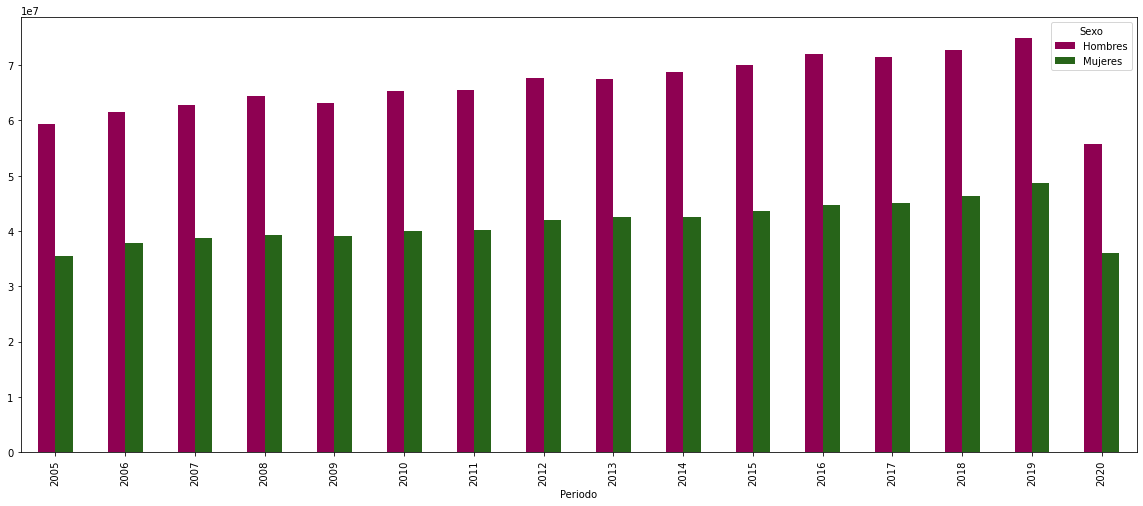

In [24]:
# recupera el salario de cada año, agrupado por sexo:
ax1 = asalariados.groupby(['Periodo', 'Sexo']).sum()['Asalariados que reportan ingresos'].unstack()
# genera el gráfico:
ax1.plot(kind="bar",figsize =(20, 8),colormap='PiYG')

As per the graph we can se a very constant growth all over the years between gender and a big difference of the amount of women vs men who persive monthly income due to an economical activity. As per following data; this is a big disparity comparing population by gender for the last 15 years; if we compare only gender values per year with the total of population over 15 years old, even though women represent over 51% of population; we expect to see them below this average as per salary perceivers.

Let's get the mean value from the differences in earned wage. <br /> Let's define a new dataframe for this, we need first to check the amount of people reporting income per year:

In [25]:
salH = (
    asalariados.loc[asalariados['Sexo']=='Hombres']
    .groupby('Periodo')
    .agg({'Asalariados que reportan ingresos':'sum'})
    .reset_index()
)
salH.set_index('Periodo')
salH=salH.rename(columns = {'Asalariados que reportan ingresos':'Hombres_reportan_ingreso'})

In [26]:
salM = (
    asalariados.loc[asalariados['Sexo']=='Mujeres']
    .groupby('Periodo')
    .agg({'Asalariados que reportan ingresos':'sum'})
    .reset_index()
)
salM.set_index('Periodo')
salM=salM.rename(columns = {'Asalariados que reportan ingresos':'Mujeres_reportan_ingreso'})

In [27]:
nSalarios=pd.concat(
    [
        salH
        ,salM.iloc[:,1]
    ]
    ,axis=1,ignore_index=False)

nSalarios = nSalarios.set_index('Periodo')

In [28]:
nSalarios['Poblacion_Por_Año']=nSalarios['Hombres_reportan_ingreso']+nSalarios['Mujeres_reportan_ingreso']
nSalarios['Diferencia_HvsM']=nSalarios['Hombres_reportan_ingreso']-nSalarios['Mujeres_reportan_ingreso']
nSalarios['%Diferencia']=np.round(nSalarios['Diferencia_HvsM']/nSalarios['Poblacion_Por_Año']*100,2)

nSalarios

,Hombres_reportan_ingreso,Mujeres_reportan_ingreso,Poblacion_Por_Año,Diferencia_HvsM,%Diferencia
Periodo,,,,,
2005,59378051,35562817,94940868,23815234,25.08
2006,61595424,37842306,99437730,23753118,23.89
2007,62794996,38829946,101624942,23965050,23.58
2008,64389566,39224122,103613688,25165444,24.29
2009,63240791,39136618,102377409,24104173,23.54
2010,65263619,40052844,105316463,25210775,23.94
2011,65491242,40109333,105600575,25381909,24.04
2012,67718213,42088329,109806542,25629884,23.34
2013,67550987,42584728,110135715,24966259,22.67


By comparing the mean of people that register income per 5 years:

In [34]:
nSalarios['%Diferencia'].mean()

23.251875

As per expected, we can see that Men report income in **23.25% more** than women in average.

#### Percentage of population who reports earning income per year vs total population.

In [29]:
popSal=nSalarios.loc[['2005','2010','2020']]

Will select only the years where we have total population data; since the join showed a not merged dataframe, will change the type of the indexes and turn them to field in order to have them onto a single dataframe.

In [ ]:
popSal.index.map(str)

In [54]:
nPop.index.map(str)

Index(['2005', '2010', '2020'], dtype='object', name='Periodo')

In [60]:
popSal.reset_index(inplace=True)

In [61]:
nPop.reset_index(inplace=True)

In [91]:
popSal['Periodo']=popSal['Periodo'].map(int)

In [92]:
join=pd.merge(popSal, nPop, on ='Periodo', how ="inner")

In [93]:
join

,Periodo,Hombres_reportan_ingreso,Mujeres_reportan_ingreso,Poblacion_Por_Año,Diferencia_HvsM,%Diferencia,Mujeres,Hombres,Total,%Mujeres,%Hombres
0,2005,59378051,35562817,94940868,23815234,25.08,53013433,50249955,103263388,51.34,48.66
1,2010,65263619,40052844,105316463,25210775,23.94,57481307,54855231,112336538,51.17,48.83
2,2020,55696079,36069661,91765740,19626418,21.39,64540634,61473390,126014024,51.22,48.78


In [94]:
join=join.drop(['Poblacion_Por_Año', 'Diferencia_HvsM','%Diferencia','Mujeres','Hombres','%Mujeres','%Hombres'], axis = 1)

In [97]:
join['%MujeresQueReportanIngreso']=np.round(join['Mujeres_reportan_ingreso']/join['Total'],2)

In [98]:
join['%HombresQueReportanIngreso']=np.round(join['Hombres_reportan_ingreso']/join['Total'],2)

In [99]:
join

,Periodo,Hombres_reportan_ingreso,Mujeres_reportan_ingreso,Total,%HombresQueReportanIngreso,%MujeresQueReportanIngreso
0,2005,59378051,35562817,103263388,0.58,0.34
1,2010,65263619,40052844,112336538,0.58,0.36
2,2020,55696079,36069661,126014024,0.44,0.29


In [102]:
np.round(join['%HombresQueReportanIngreso'].mean()*100,2)

53.33

In [103]:
np.round(join['%MujeresQueReportanIngreso'].mean()*100,2)

33.0

As per expected, even though women comform over 51% of mexican population, men still represent the 53% of working population who earns some sort of salary, more than 20% than what women represent, this also not only means that men are still more present on labour force, but that women still have the most heavy work load (considering unpaid work such as taking care of house chores; unfortunately by now we can't refute this since there's no more available data).

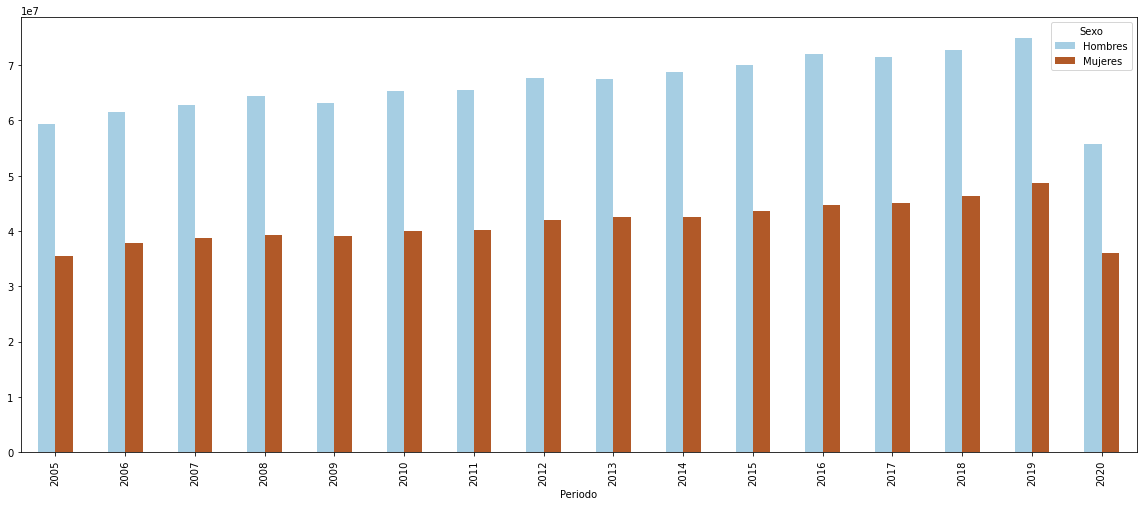

In [40]:
# recupera el salario de cada año, agrupado por sexo:
ax2 = asalariados.groupby(['Periodo', 'Sexo']).sum()['Asalariados que reportan ingresos'].unstack()
# genera el gráfico:
ax2.plot(kind="bar",figsize =(20, 8),colormap='Paired')

#### Working force who earns maximum 3 minimum wages in total.

So we'll check the growth in percentage over the years by gender, the hypothesis is that the grown for men has grown quicker than female.<br />
Let's explore about the differences on the marginalized population by gender; those who earns tops 3 minimum wages (around 6 USD per hour by 2022).

In [35]:
asalH = (
    asalariados.loc[asalariados['Sexo']=='Hombres']
    .groupby('Periodo')
    .agg({'Asalariados que ganan hasta 3 salarios mínimos':'sum'})
    .reset_index()
)
asalH.set_index('Periodo')
asalH=asalH.rename(columns = {'Asalariados que ganan hasta 3 salarios mínimos':'Hombres_Que_Ganan_Hasta_3_SalMin'})

In [36]:
asalM = (
    asalariados.loc[asalariados['Sexo']=='Mujeres']
    .groupby('Periodo')
    .agg({'Asalariados que ganan hasta 3 salarios mínimos':'sum'})
    .reset_index()
)
asalM.set_index('Periodo')
asalM=asalM.rename(columns = {'Asalariados que ganan hasta 3 salarios mínimos':'Mujeres_Que_Ganan_Hasta_3_SalMin'})

In [37]:
new_asalariados=pd.concat(
    [
        asalH
        ,asalM.iloc[:,1]
    ]
    ,axis=1,ignore_index=False)

new_asalariados=new_asalariados.set_index('Periodo')

In [38]:
new_asalariados['TotPopPorAño']=new_asalariados['Hombres_Que_Ganan_Hasta_3_SalMin']+new_asalariados['Mujeres_Que_Ganan_Hasta_3_SalMin']
new_asalariados['Diferencia']=new_asalariados['Hombres_Que_Ganan_Hasta_3_SalMin']-new_asalariados['Mujeres_Que_Ganan_Hasta_3_SalMin']
new_asalariados['%Diferencia']=np.round(new_asalariados['Diferencia']/new_asalariados['TotPopPorAño']*100,2)

new_asalariados

,Hombres_Que_Ganan_Hasta_3_SalMin,Mujeres_Que_Ganan_Hasta_3_SalMin,TotPopPorAño,Diferencia,%Diferencia
Periodo,,,,,
2005,37966773,25579672,63546445,12387101,19.49
2006,37935850,26273676,64209526,11662174,18.16
2007,39490148,27362066,66852214,12128082,18.14
2008,39905223,27620035,67525258,12285188,18.19
2009,40059516,27504496,67564012,12555020,18.58
2010,42087815,29070486,71158301,13017329,18.29
2011,45122481,29678320,74800801,15444161,20.65
2012,45963869,30967694,76931563,14996175,19.49
2013,46263630,31708043,77971673,14555587,18.67


In [82]:
np.round(new_asalariados['%Diferencia'].mean(),2)

18.33

In average, there's around 18% more men than women earning at most three minimum wage; still with this difference we can't conclude much more since:
* It could depend if for those families, male figure is the main source for its family or home.
* We depend on further analysis considering the ocupancy on formal and informal activities per gender.

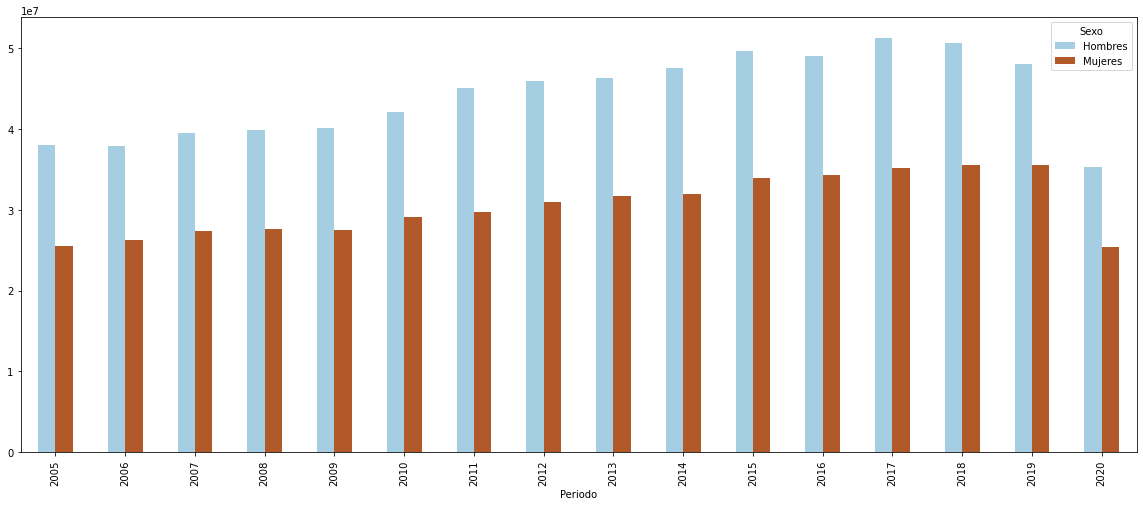

In [104]:
# recupera el salario de cada año, agrupado por sexo:
ax2 = asalariados.groupby(['Periodo', 'Sexo']).sum()['Asalariados que ganan hasta 3 salarios mínimos'].unstack()
# genera el gráfico:
ax2.plot(kind="bar",figsize =(20, 8),colormap='Paired')

Even though we expected to watch some significant difference in growth, we can see a similar performance between two genders, keeping same difference in earning; having a brief growth in 2011 and a brief closure at the beginning of the pandemic (2020). But still, is notizable the disparity even in marginalized sectors.

#### Percentage of working force by gender who earn as much as 3 minimum wages.

Even though we previously concluded that men still represent a higher ocupancy in income, with following graph we can observe how from total population, women represent the higher percentage of earning maximum 3 minimum wages. <br />
From this, as we expected, we can state how dispair is earning between genders, and though women represent mayority in population, the presence of them into work-force is still misspaid or replaced by male figures at job.

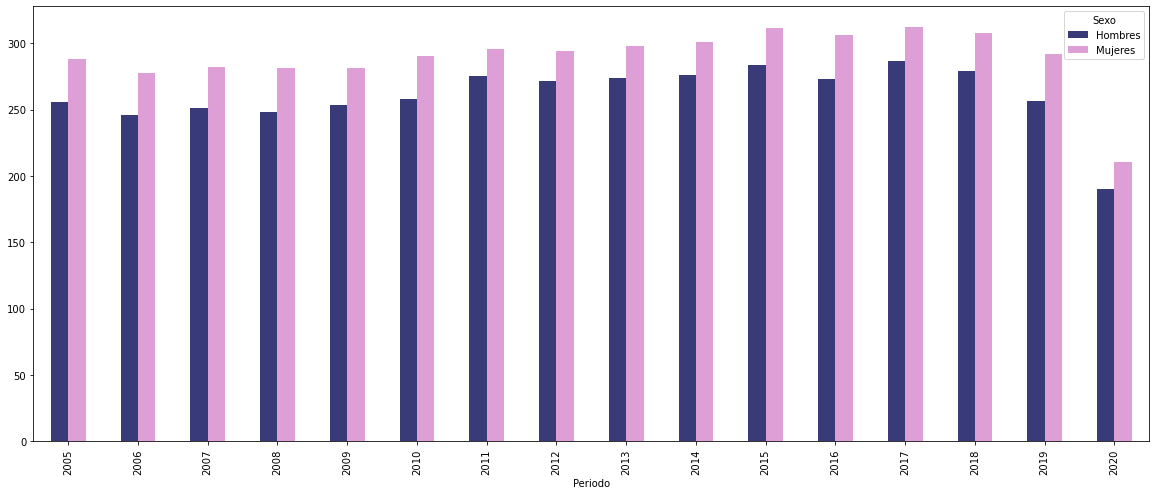

In [41]:
# recupera el salario de cada año, agrupado por sexo:
ax2 = asalariados.groupby(['Periodo', 'Sexo']).sum()['Porcentaje de asalariados que ganan hasta tres salarios mínimos'].unstack()
# genera el gráfico:
ax2.plot(kind="bar",figsize =(20, 8),colormap='tab20b')

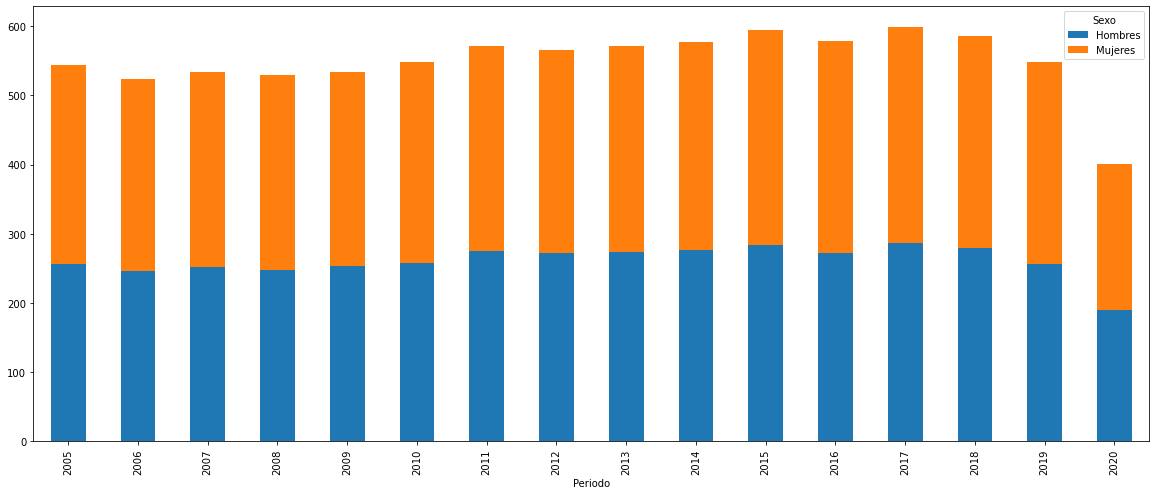

In [105]:
ax3 = asalariados.groupby(['Periodo','Sexo'])['Porcentaje de asalariados que ganan hasta tres salarios mínimos'].sum().unstack('Sexo').fillna(0)
ax3.plot(kind='bar', stacked=True,figsize=(20,8))